<a id="step9"></a>
## Baseline QSAR Comparison
- Load `classification_performance_summary.csv`.  
- Auto-select best baseline by accuracy and print its `model_type` and `input_type`.  
- Compare baseline vs. final DeepGNNWithEdgeFeatures on all metrics.  
- **Visualizations updated:** side-by-side **bar chart** plus **radar plot**.


Baseline QSAR → model: 'SVM', feature selection: 'genetic_algorithm', accuracy: 0.828
Final DeepGNNWithEdgeFeatures → accuracy: 0.736, precision: 0.730, recall: 0.736, f1_score: 0.732, auc_roc: 0.844


,Baseline QSAR,Final DeepGNNWithEdgeFeatures
accuracy,0.828,0.736
precision,0.828,0.730
recall,0.828,0.736
f1_score,0.828,0.732


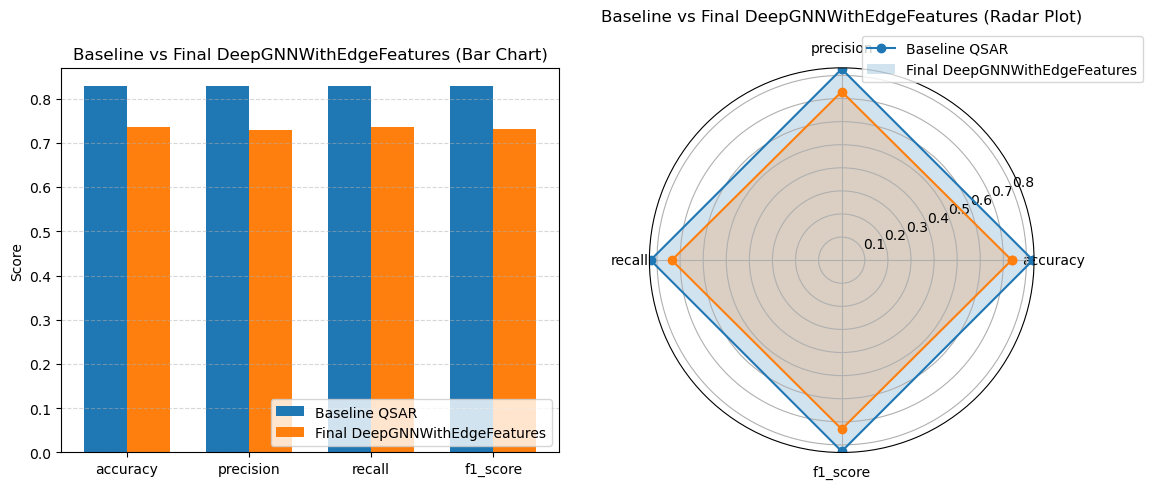

In [1]:
# %%
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load baseline summary CSV
baseline_csv = "../6_baseline_comparison/QSAR_classification_performance_summary.csv"
baseline_df  = pd.read_csv(baseline_csv)

# Pick the row with the highest accuracy
best_baseline_idx = baseline_df["accuracy"].idxmax()
best_baseline     = baseline_df.loc[best_baseline_idx]

# Print which baseline you’re using
model_type = best_baseline["model_type"]
input_type = best_baseline["input_type"]
print(
    f"Baseline QSAR → model: '{model_type}', "
    f"feature selection: '{input_type}', "
    f"accuracy: {best_baseline['accuracy']:.3f}"
)

# Extract baseline metrics
baseline_metrics = {
    "accuracy":  best_baseline["accuracy"],
    "precision": best_baseline["precision"],
    "recall":    best_baseline["recall"],
    "f1_score":  best_baseline["f1_score"],
}

#Load final DeepGNNWithEdgeFeatures metrics from CSV
kfold =10  # ← adjust this value based on your k-fold cross-validation
model = "DeepGNNWithEdgeFeatures"  # ← adjust this value based on your model
final_csv = f"../5_model_training/GraphSAGE_results/classification_{kfold}fold/final_metrics.csv"  # ← adjust this path
final_df  = pd.read_csv(final_csv)
final_row = final_df.iloc[0]

print(
    f"Final DeepGNNWithEdgeFeatures → accuracy: {final_row['accuracy']:.3f}, "
    f"precision: {final_row['precision']:.3f}, "
    f"recall: {final_row['recall']:.3f}, "
    f"f1_score: {final_row['f1_score']:.3f}, "
    f"auc_roc: {final_row.get('auc_roc', np.nan):.3f}"
)

final_metrics = {
    "accuracy":  final_row["accuracy"],
    "precision": final_row["precision"],
    "recall":    final_row["recall"],
    "f1_score":  final_row["f1_score"],
}

#Build comparison DataFrame
metrics = list(baseline_metrics.keys())
comp_df = pd.DataFrame({
    "Baseline QSAR": [baseline_metrics[m] for m in metrics],
    "Final DeepGNNWithEdgeFeatures":    [final_metrics[m]    for m in metrics]
}, index=metrics).round(3)

display(comp_df)

#Plot bar chart and radar plot side-by-side
labels        = metrics
baseline_vals = comp_df['Baseline QSAR'].tolist()
final_vals    = comp_df['Final DeepGNNWithEdgeFeatures'].tolist()

fig = plt.figure(figsize=(12, 5))

# Bar chart
ax_bar = fig.add_subplot(1, 2, 1)
x = np.arange(len(labels))
width = 0.35
ax_bar.bar(x - width/2, baseline_vals, width, label='Baseline QSAR')
ax_bar.bar(x + width/2, final_vals,    width, label='Final DeepGNNWithEdgeFeatures')
ax_bar.set_xticks(x)
ax_bar.set_xticklabels(labels, rotation=0)
ax_bar.set_ylabel('Score')
ax_bar.set_title('Baseline vs Final DeepGNNWithEdgeFeatures (Bar Chart)')
ax_bar.legend(loc='lower right')
ax_bar.grid(axis='y', linestyle='--', alpha=0.5)

# Save the bar chart as an image
plt.savefig(f"bar_chart_{model}_vs_QSARcomparison.png")

# Radar plot
ax_rad = fig.add_subplot(1, 2, 2, polar=True)
baseline_loop = baseline_vals + baseline_vals[:1]
final_loop    = final_vals    + final_vals[:1]
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]
ax_rad.plot(angles, baseline_loop, marker='o')
ax_rad.fill(angles, baseline_loop, alpha=0.2)
ax_rad.plot(angles, final_loop, marker='o')
ax_rad.fill(angles, final_loop, alpha=0.2)
ax_rad.set_thetagrids(np.degrees(angles[:-1]), labels)
ax_rad.set_title('Baseline vs Final DeepGNNWithEdgeFeatures (Radar Plot)', y=1.1)
ax_rad.legend(['Baseline QSAR', 'Final DeepGNNWithEdgeFeatures'], loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Save the radar plot as an image
plt.savefig(f"radar_plot_{model}_vs_QSARcomparison.png")

plt.tight_layout()
plt.show()
